In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [15]:
cap = pd.read_excel('Cap_Sector.xlsx')
cap = cap.set_index(['Code', 'Sector']).transpose()
cap.reset_index(inplace=True)
cap.rename(columns={'index': 'Date'}, inplace=True)
cap['Date'] = pd.to_datetime(cap['Date'], errors='coerce')
cap.head()

Code,Date,1101,1102,1103,1104,1108,1109,1110,1201,1203,...,9151,9157,916665,9188,9801,9903,9915,9922,9936,L2301
Sector,,others,others,others,others,others,others,others,others,others,...,others,others,others,others,others,others,others,others,others,others
0,2023-12-29,263159,147005,15054,19995,6395,6226,10754,9640,13656,...,-,-,-,-,-,-,-,-,-,-
1,2023-09-28,237943,140976,14659,17537,5828,6056,10725,9337,9972,...,-,-,-,-,-,-,-,-,-,-
2,2023-06-30,272293,157467,16658,20066,6881,6311,11011,10273,11004,...,-,-,-,-,-,-,-,-,-,-
3,2023-03-31,260485,153539,14682,17321,5727,5817,10039,10121,9300,...,-,-,-,-,-,-,-,-,-,-
4,2022-12-30,240806,145383,13481,14510,4351,5339,10696,9640,8376,...,-,-,-,-,-,-,-,-,-,-


/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_3670/2607720376.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  cap_sums = cap_numeric.groupby(cap.columns.get_level_values(1), axis=1).sum()


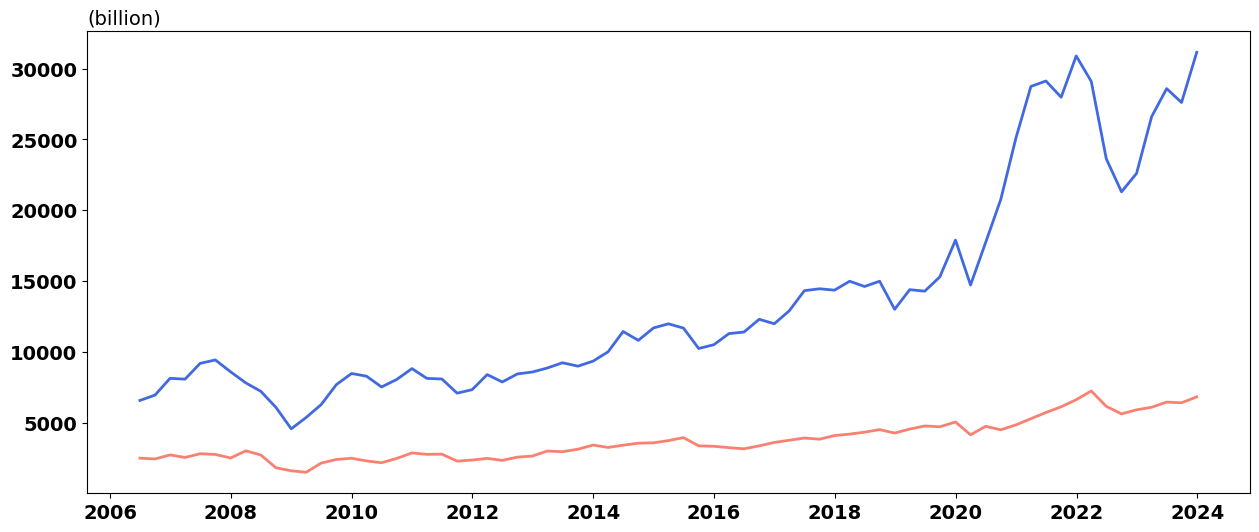

In [76]:
cap_numeric = cap.copy()
for col in cap_numeric.columns[1:]:
    cap_numeric[col] = pd.to_numeric(cap_numeric[col], errors='coerce')
cap_sums = cap_numeric.groupby(cap.columns.get_level_values(1), axis=1).sum()
cap_sums['Date'] = cap['Date']

electronic_sum = cap_sums.get('electronic', pd.Series(0, index=cap_sums.index))
financial_sum = cap_sums.get('financial', pd.Series(0, index=cap_sums.index))
others_sum = cap_sums.get('others', pd.Series(0, index=cap_sums.index))

cap_sums = pd.DataFrame({
    'Date': cap_sums['Date'],
    'electronic': electronic_sum,
    'financial': financial_sum,
    'others': others_sum
})

cap_sums['electronic'] /= 1000
cap_sums['financial'] /= 1000
cap_sums['others'] /= 1000

plt.figure(figsize=(15, 6))
plt.plot(cap_sums['Date'], cap_sums['electronic'], color='royalblue', linewidth=2)
plt.plot(cap_sums['Date'], cap_sums['financial'], color='salmon', linewidth=2)

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(billion)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=14, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.savefig('cap_sector_compare.png', dpi=144, transparent=True)
plt.show()